In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread('messi5.jpg',0)
img2 = img.copy()
template = cv2.imread('template.jpg',0)
w, h = template.shape[::-1]

## w,h에는 template의 전체 크기가 저장된다 ( 즉, 그림의 가로, 세로가 저장된다 ) 

In [3]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
## 여섯가지의 방법을 string 형태로 배열에 집어넣었다.

(561, 58)
40 52
(601L, 110L)


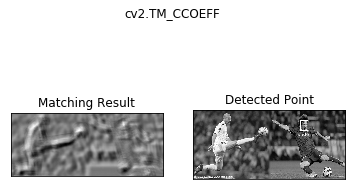

(561, 58)
40 52
(601L, 110L)


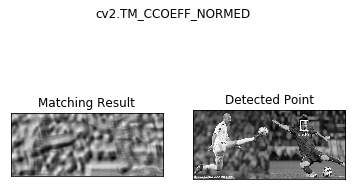

(120, 122)
40 52
(160L, 174L)


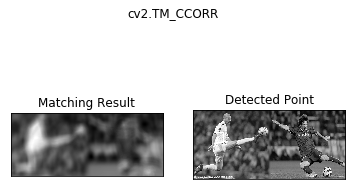

(561, 58)
40 52
(601L, 110L)


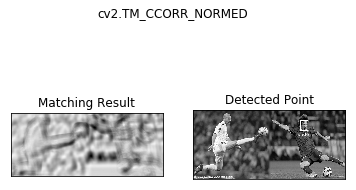

(561, 58)
40 52
(601L, 110L)


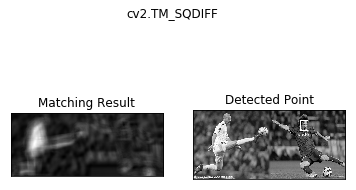

(561, 58)
40 52
(601L, 110L)


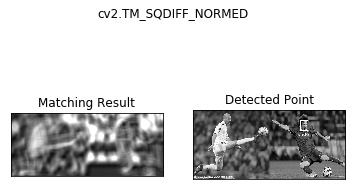

In [4]:
for meth in methods:
 ##여섯가지 방법에 대해서, 한번씩 실행
    method = eval(meth)
    img = img2.copy()
    
    res = cv2.matchTemplate(img,template,method)
    # 원본 이미지에 템플릿 이미지를 좌측상단 부터 미끄러지듯이 우측으로 이동하면서 계속 비교하는 함수.
    
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # TM_SQDIFF ,TM_SQDIFF_NORMED는 가장 어두운 부분을 찾아서 검색하는 방법이고
    # 나머지들은 가장 밝은 부분을 찾아서 검색하는 방법이다.
    # 따라서 두 경우를 분리해서 생각해야 한다.
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
        
        #top_left에는 시작기준점이 되는(가장 밝거나, 가장 어둡거나) 좌표가 들어간다.
    bottom_right = (top_left[0] + w, top_left[1] + h)
    #기준점을 시작으로 가로로 w, 세로로 h만한 사각형이 그려질 예정이다.

    print top_left
    print w, h
    print bottom_right
    
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    ##두께가 2이고 색이 255인 사각형을 그린다.

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()